In [259]:
import cv2
import numpy as np 
import sklearn 
import scipy
import matplotlib.pyplot as plt

# Bài 1

In [260]:
def rgb2gray(image):
    gray = np.zeros((image.shape[0], image.shape[1]))
    red = image[:,:,0]
    green = image[:,:,1]
    blue = image[:,:,2]
    gray = 0.2989 * red + 0.5870 * green + 0.1140 * blue
    return gray

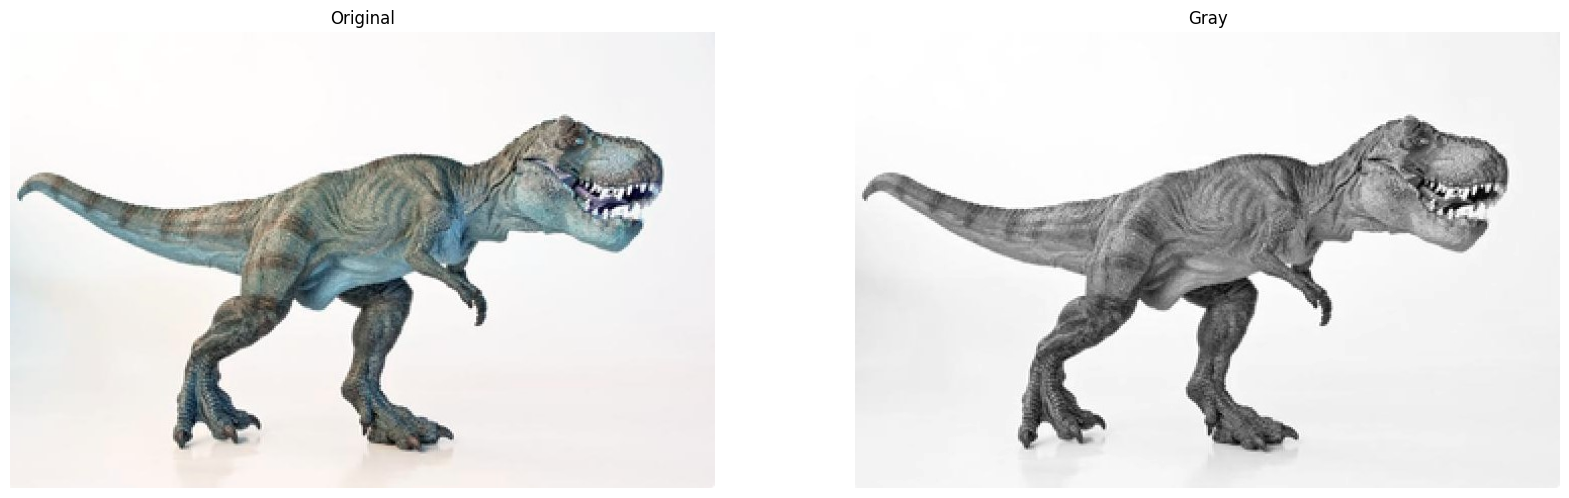

In [261]:
image = cv2.imread('302843992_485786496928626_6191234182030738228_n.png')
gray = rgb2gray(image)
# show image
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(image)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Gray')
plt.imshow(gray,cmap='gray')
plt.axis('off')
plt.show()

# Bài 2

In [262]:
def split_image(image):
    image = image.copy()
    red = np.zeros((image.shape[0], image.shape[1], 3),dtype=np.uint8)
    green = np.zeros((image.shape[0], image.shape[1], 3),dtype=np.uint8)
    blue = np.zeros((image.shape[0], image.shape[1], 3),dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            red_channel = image[i,j,0]
            green_channel = image[i,j,1]
            blue_channel = image[i,j,2]
            if red_channel<200 and green_channel<200 and blue_channel<200:
                red[i,j,0] = red_channel
                green[i,j,1] = green_channel
                blue[i,j,2] = blue_channel
    return red, green, blue

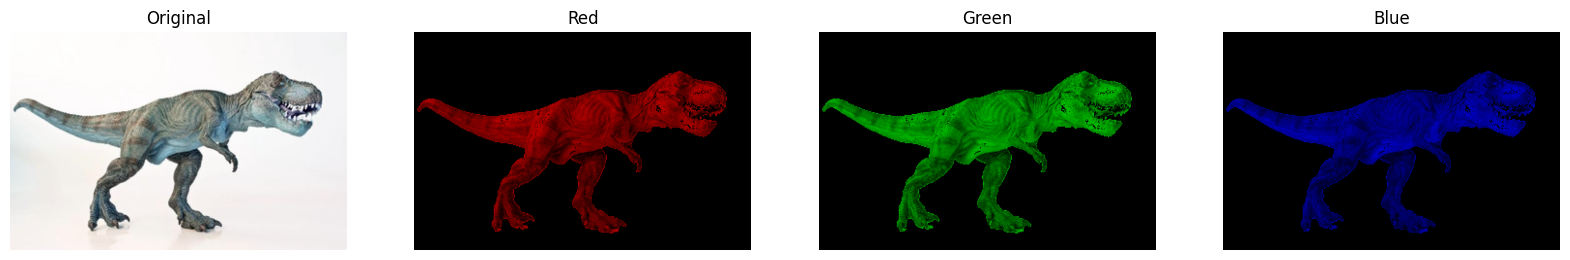

In [263]:
image = cv2.imread('302843992_485786496928626_6191234182030738228_n.png')
red, green, blue = split_image(image)
# show 4 images side by side
plt.figure( figsize=(20,10) )
plt.subplot(1,4,1)
plt.title('Original')
plt.imshow(image)
plt.axis('off')
plt.subplot(1,4,2)
plt.title('Red')
plt.imshow(red)
plt.axis('off')
plt.subplot(1,4,3)
plt.axis('off')
plt.title('Green')
plt.imshow(green)
plt.subplot(1,4,4)
plt.axis('off')
plt.title('Blue')
plt.imshow(blue)
plt.show()

# Bài 3

In [264]:
def show_canvas(canvas):
    plt.figure()
    plt.imshow(canvas)
    plt.axis('off')
    plt.show()

In [265]:
def in_polygon(x, y, polygon):
    # check if the point (x,y) is inside the polygon without cv2
    result = False
    for i in range(len(polygon)):
        j = (i+1)%len(polygon)
        if (polygon[i][1] > y) != (polygon[j][1] > y) and \
            x < (polygon[j][0] - polygon[i][0]) * (y - polygon[i][1]) / (polygon[j][1] - polygon[i][1]) + polygon[i][0]:
            result = not result
    return result


def draw(canvas,polygon,color,offset_x=0,offset_y=0):
    canvas = canvas.copy()
    polygon = np.array(polygon)
    polygon[:,0] += offset_x
    polygon[:,1] += offset_y
    
    # each pixel in canvas 
    for i in range(canvas.shape[0]):
        for j in range(canvas.shape[1]):
            # check if the pixel is inside the polygon
            if in_polygon(j,i,polygon):
                canvas[i,j] = color
            
    return canvas

In [266]:
canvas = np.zeros((100,100,3),dtype=np.uint8)

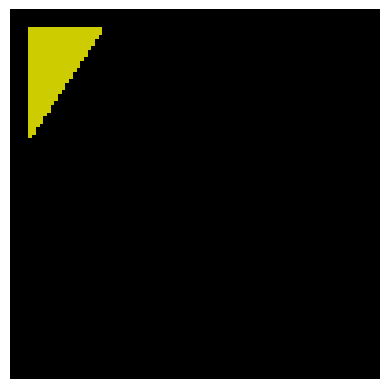

In [267]:
# tam giác vuông có 2 cạnh 20,30 px
triangle = [(0,0),(20,0),(0,30)]
canvas = draw(canvas,triangle,(204,204,0),offset_x=5,offset_y=5)
show_canvas(canvas)

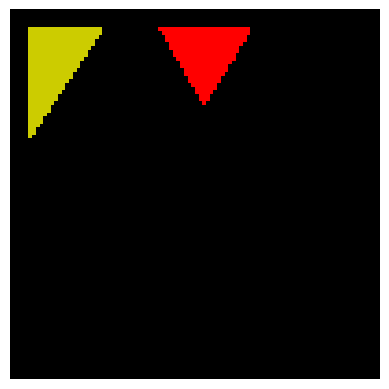

In [268]:
#  Tam giác đều có các cạnh dài 25 pixel, tô màu đỏ
triangle = [(0,0),(25,0),(12,21)]
canvas = draw(canvas,triangle,(255,0,0),offset_x=40,offset_y=5)
show_canvas(canvas)

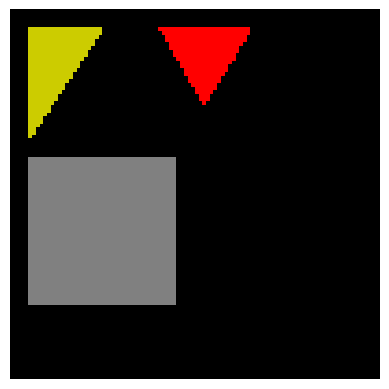

In [269]:
# Hình vuông có cạnh 40 pixel, màu xám
square = [(0,0),(40,0),(40,40),(0,40)]
canvas = draw(canvas,square,(128,128,128),offset_x=5,offset_y=40)
show_canvas(canvas)

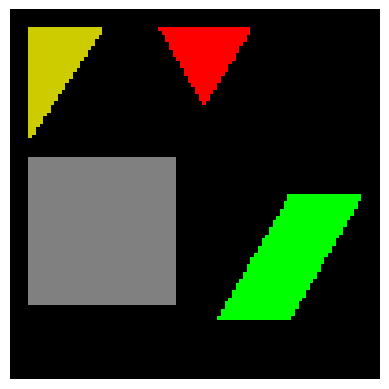

In [270]:
# Hình bình hành có 2 cạnh là 20 pixel và 40 pixel, màu xanh lá
rhombus = [(0,0),(20,0),(0,34),(-20,34)]
canvas = draw(canvas,rhombus,(0,255,0),offset_x=75,offset_y=50)
show_canvas(canvas)